In [1]:
from PIL import Image
import numpy as np
import random
import os
import datetime
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
fh = np.load('./result/resu_40_1_all.npy',allow_pickle=True)

def calEuclidean(x, y):
    dist = np.sqrt(np.sum(np.square(x-y)))   # 注意：np.array 类型的数据可以直接进行向量、矩阵加减运算。np.square 是对每个元素求平均~~~~
    return dist

In [3]:
imgs = []
ddd = []
for line in fh:
    imgs.append((line[0],line[42]))
    d1 = [float(i) for i in line[2:42]]
    d2 = [float(i) for i in line[44:]]
    ddd.append(calEuclidean(np.array(d1),np.array(d2)))
print(imgs[:10])
print(ddd[:10])

[('/data/GZ_Decals/MGS_out_DECaLS/175.89149808110213_21.67228737779398_0.262_grz_.fits', '/data/GZ_Decals/nomerge/175.8905862789053_21.66981935317594_0.fits'), ('/data/GZ_Decals/MGS_out_DECaLS/176.1464259029576_6.42738628465911_0.262_grz_.fits', '/data/GZ_Decals/nomerge/176.14777944132385_6.43021218747715_0.fits'), ('/data/GZ_Decals/MGS_out_DECaLS/216.73248662726843_-2.558336707515353_0.262_grz_.fits', '/data/GZ_Decals/nomerge/216.73420321996912_-2.5567049269072277_0.fits'), ('/data/GZ_Decals/MGS_out_DECaLS/249.26423000107675_26.699189190862203_0.262_grz_.fits', '/data/GZ_Decals/merge/249.2632324703534_26.69968242446739_0.fits'), ('/data/GZ_Decals/MGS_out_DECaLS/229.36038312245492_12.946228665259735_0.262_grz_.fits', '/data/GZ_Decals/nomerge/229.35780548542343_12.945866234484898_0.fits'), ('/data/GZ_Decals/MGS_out_DECaLS/133.78515240878852_23.368498165544217_0.262_grz_.fits', '/data/GZ_Decals/nomerge/133.7835302320826_23.36520378191616_0.fits'), ('/data/GZ_Decals/MGS_out_DECaLS/248.282

In [4]:
dat = []
for fnn in imgs:
    datt = []
    for fn in fnn:
        hdu = fits.open(fn)
        img = hdu[0].data
        img = np.array(img,dtype=np.float32)
        datt.append(img)
    dat.append(datt)

In [4]:
# dat = []
# for fnn in imgs[:10]:
#     datt = []
#     for fn in fnn:
#         hdu = fits.open(fn)
#         datt.append(hdu)
#     dat.append(datt)

In [6]:
# dat[0][0][0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  256 / length of data axis 1                          
NAXIS2  =                  256 / length of data axis 2                          
NAXIS3  =                    3 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
SURVEY  = 'DECaLS  '                                                            
VERSION = 'DR8-south'                                                           
IMAGETYP= 'image   '                                                            
BANDS   = 'grz     '        

In [7]:
# dat[0][1][0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  256 / length of data axis 1                          
NAXIS2  =                  256 / length of data axis 2                          
NAXIS3  =                    3 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
SURVEY  = 'DECaLS  '                                                            
VERSION = 'DR8-south'                                                           
IMAGETYP= 'image   '                                                            
BANDS   = 'grz     '        

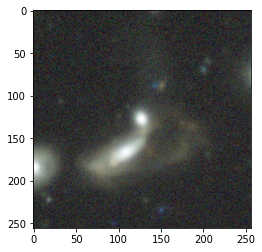

In [5]:
from stretch import ycl
a=1
def meann(img):
    imm = Image.fromarray(np.uint8(ycl(img).transpose(1,2,0)*255)).convert('RGB')
    return imm
plt.imshow(meann(dat[a][0]))

In [6]:
ddd = np.array(ddd)
ind = np.argsort(ddd)
print(ind)
print(ddd.max())
print(ddd[ind[-1]])

[3237 1012 3199 ... 2929 2521 2093]
81.2848241675506
81.2848241675506


In [7]:
print(ddd[-10:])

[ 3.87102895 10.52517855  3.60997072  1.91363292  3.97303192 11.42498052
  1.42650117 15.99459454  1.44241729  3.97929029]


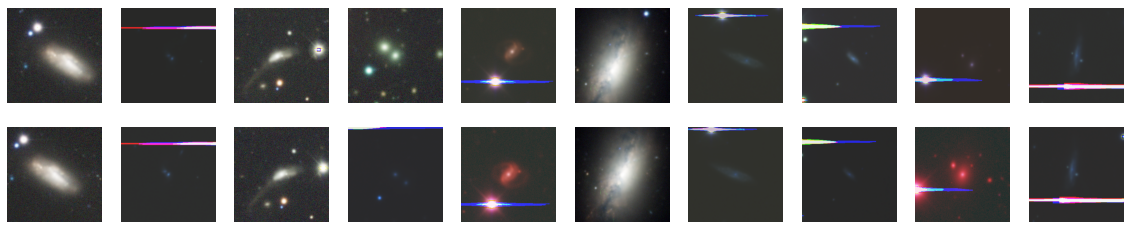

In [10]:
c = [int(i) for i in ind[-10:]]

w,h = 2,10
fig, axes = plt.subplots(w,h,figsize = (20,4))
for a in range(w):
    for i in range(h):
        fig.add_subplot(w, h, i+1+h*a)
        plt.imshow(meann(dat[c[i]][a]))
        plt.axis("off")
        axes[a,i].axis('off')
plt.savefig("in_out_dislike.jpg",dpi=400)

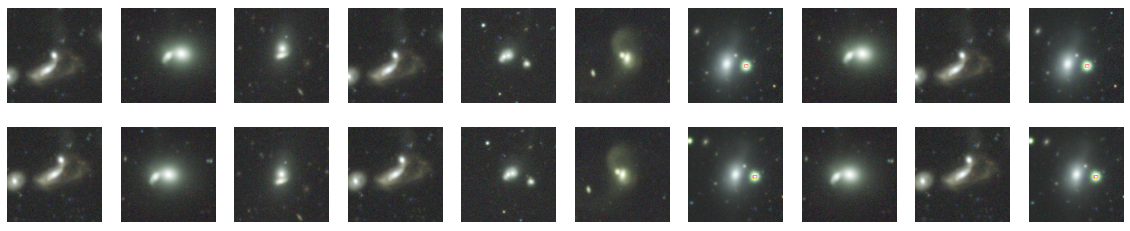

In [18]:
c = [int(i) for i in ind[10:20]]
w,h = 2,10
fig, axes = plt.subplots(w,h,figsize = (20,4))
for a in range(w):
    for i in range(h):
        fig.add_subplot(w, h, i+1+h*a)
        plt.imshow(meann(dat[c[i]][a]))
        plt.axis("off")
        axes[a,i].axis('off')
plt.savefig("in_out_like.jpg",dpi=400)